In [1]:
!unzip /content/img_data.zip

Archive:  /content/img_data.zip
   creating: content/img_data/
   creating: content/img_data/test/
   creating: content/img_data/test/happy/
 extracting: content/img_data/test/happy/10098.jpg  
 extracting: content/img_data/test/happy/35181.jpg  
 extracting: content/img_data/test/happy/21223.jpg  
 extracting: content/img_data/test/happy/5756.jpg  
 extracting: content/img_data/test/happy/19757.jpg  
 extracting: content/img_data/test/happy/10826.jpg  
 extracting: content/img_data/test/happy/18282.jpg  
 extracting: content/img_data/test/happy/2898.jpg  
 extracting: content/img_data/test/happy/3639.jpg  
 extracting: content/img_data/test/happy/4276.jpg  
 extracting: content/img_data/test/happy/34447.jpg  
 extracting: content/img_data/test/happy/10469.jpg  
 extracting: content/img_data/test/happy/4967.jpg  
 extracting: content/img_data/test/happy/11332.jpg  
 extracting: content/img_data/test/happy/3243.jpg  
 extracting: content/img_data/test/happy/4913.jpg  
 extracting: conte

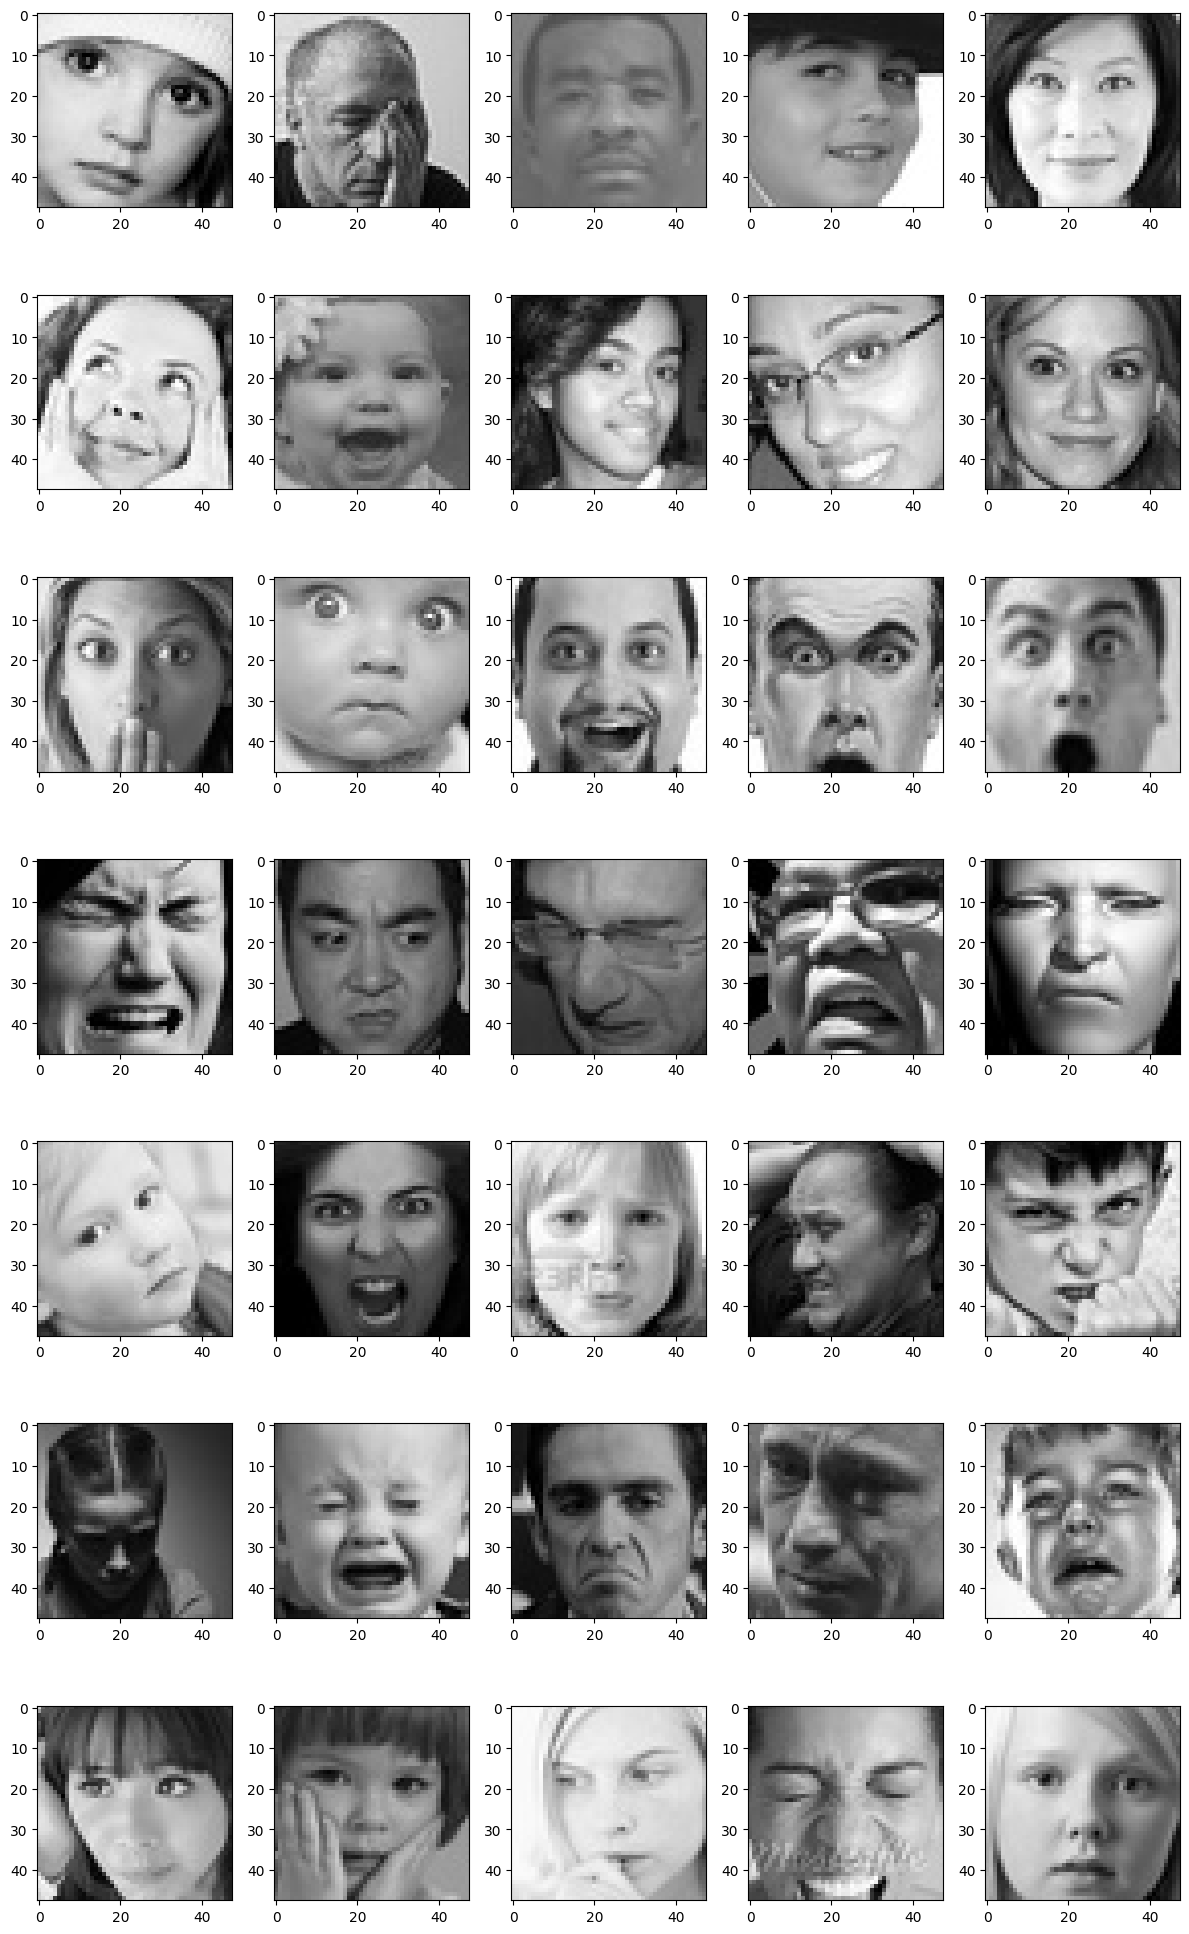

In [2]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/content/img_data/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "val/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "val/" + expression + "/" +os.listdir(base_path + "val/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [3]:
!pip install split-folders

In [4]:
%rm -rf img_data.zip

In [5]:
import splitfolders
splitfolders.ratio("/content/content/img_data/val", output="img_data", seed=1, ratio=(0.9, 0.07, 0.03), group_prefix=None)

Copying files: 2014 files [00:00, 3941.27 files/s]


In [6]:
%rm -rf img_data/val/

In [7]:
!zip -r img_data.zip /content/img_data/

  adding: content/img_data/ (stored 0%)
  adding: content/img_data/test/ (stored 0%)
  adding: content/img_data/test/neutral/ (stored 0%)
  adding: content/img_data/test/neutral/4499.jpg (stored 0%)
  adding: content/img_data/test/neutral/21776.jpg (stored 0%)
  adding: content/img_data/test/neutral/19521.jpg (stored 0%)
  adding: content/img_data/test/neutral/13043.jpg (stored 0%)
  adding: content/img_data/test/neutral/31073.jpg (stored 0%)
  adding: content/img_data/test/neutral/15827.jpg (stored 0%)
  adding: content/img_data/test/neutral/8648.jpg (stored 0%)
  adding: content/img_data/test/neutral/3266.jpg (stored 0%)
  adding: content/img_data/test/neutral/15305.jpg (stored 0%)
  adding: content/img_data/test/neutral/30146.jpg (stored 0%)
  adding: content/img_data/test/neutral/26790.jpg (stored 0%)
  adding: content/img_data/test/happy/ (stored 0%)
  adding: content/img_data/test/happy/23276.jpg (stored 0%)
  adding: content/img_data/test/happy/24227.jpg (stored 0%)
  adding: co

In [ ]:
from google.colab import files
files.download('img_data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# count number of train images for each expression

for expression in os.listdir(base_path + "val"):
    print(str(len(os.listdir(base_path + "val/" + expression))) + " " + expression + " images")

348 neutral images
287 fear images
224 surprise images
30 disgust images
345 sad images
501 happy images
279 angry images


In [9]:
import os
from shutil import rmtree
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_path = "/content/content/img_data/"
pic_size = (48, 48)  # adjust the size as needed
batch_size = 128

# Define the classes to be dropped
classes_to_drop = ['neutral', 'disgust']

# Function to delete specified classes from the directory
def delete_classes(base_path, classes_to_drop):
    for class_to_drop in classes_to_drop:
        class_path = os.path.join(base_path, "val", class_to_drop)
        #class_path = os.path.join(base_path, "test", class_to_drop)
        if os.path.exists(class_path):
            rmtree(class_path)

# Delete specified classes from the directory
delete_classes(base_path, classes_to_drop)

# Create data generators after deleting classes
datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(os.path.join(base_path, "val"),
                                                    target_size=pic_size,
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(os.path.join(base_path, "test"),
                                                              target_size=pic_size,
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              shuffle=False)


Found 1636 images belonging to 5 classes.
Found 707 images belonging to 5 classes.


In [10]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
base_path = "/content/content/img_data/"

train_generator = datagen_train.flow_from_directory(base_path + "val",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1636 images belonging to 5 classes.
Found 707 images belonging to 5 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(pic_size, pic_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # Assuming 7 classes for facial expressions

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import tensorflow as tf


# Your model and training code here

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.0001
dropout_rate = 0.5

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Include the early stopping callback
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Ba  (None, 23, 23, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 23, 23, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 128)      

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Activation

# Your model and training code here

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.001
dropout_rate = 0.6

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Include the early stopping callback
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_26 (Ba  (None, 46, 46, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 64)       

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU  # Import LeakyReLU

# Your model and training code here

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 1)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.001
dropout_rate = 0.6

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])



In [14]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.8 MB/s eta 0:00:00


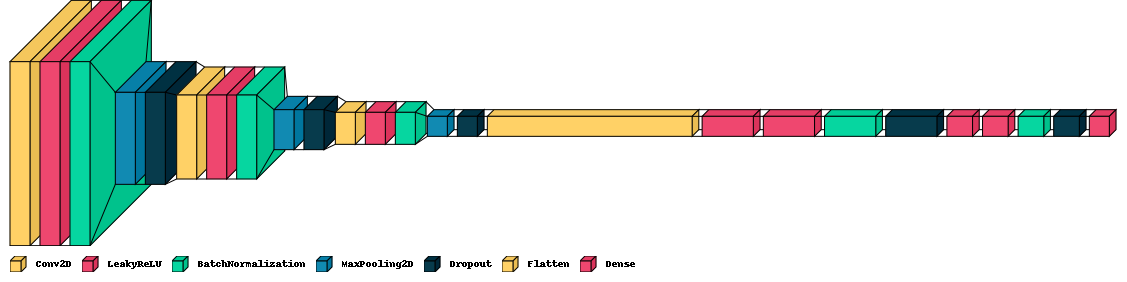

In [18]:
from PIL import ImageFont

visualkeras.layered_view(model, legend=True)  # font is optional!

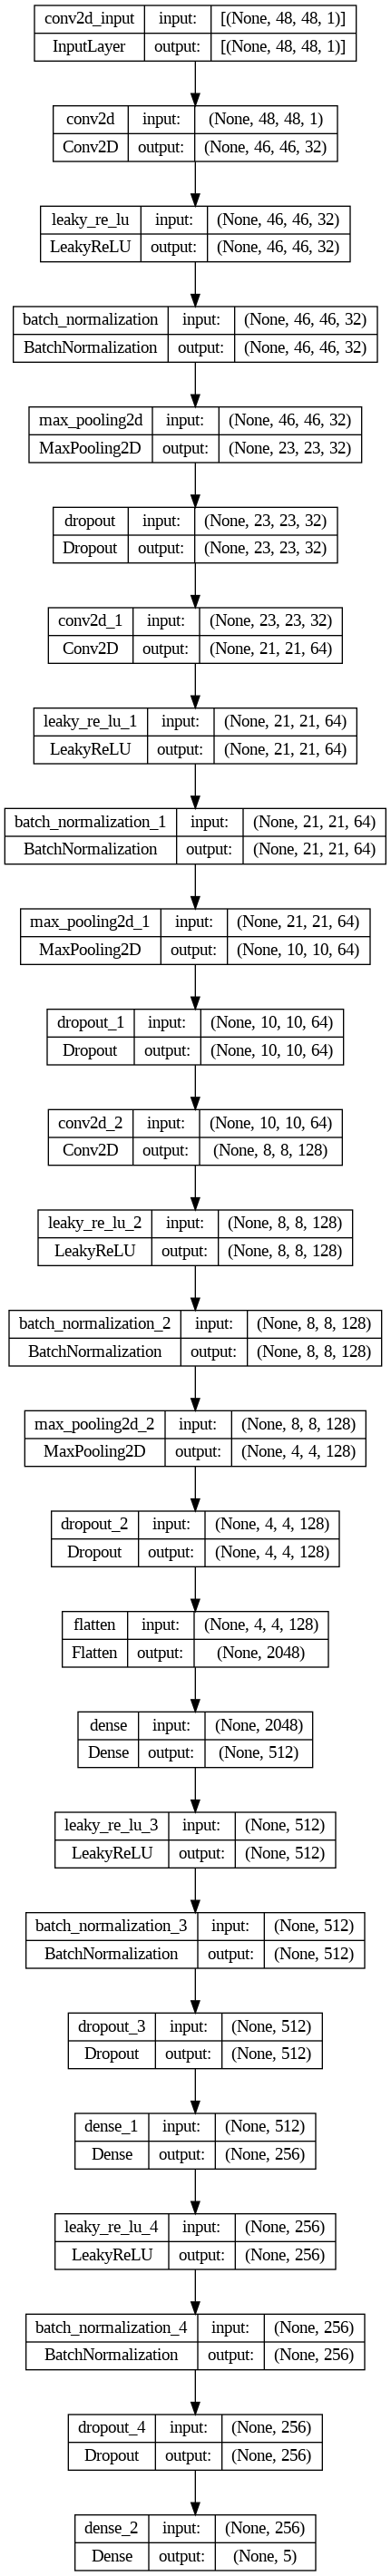

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU  # Import LeakyReLU

# Your model and training code here

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 1)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU instead of relu
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.001
dropout_rate = 0.6

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Include the early stopping callback
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 46, 46, 32)        0         
                                                                 
 batch_normalization_36 (Ba  (None, 46, 46, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 64)       

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Your model and training code here

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(48, 48, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.0001

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')



Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 leaky_re_lu_71 (LeakyReLU)  (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_110 (B  (None, 48, 48, 64)        256       
 atchNormalization)                                              
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_107 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 24, 24, 128)     

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(48, 48, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(GlobalAveragePooling2D())

model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.0001

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 leaky_re_lu_122 (LeakyReLU  (None, 48, 48, 64)        0         
 )                                                               
                                                                 
 batch_normalization_161 (B  (None, 48, 48, 64)        256       
 atchNormalization)                                              
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_144 (Dropout)       (None, 24, 24, 64)        0         
                                                     

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define a CNN model with hyperparameter tuning
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(pic_size, pic_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.0001
dropout_rate = 0.5

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Include the early stopping callback
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 10, 10, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 4, 4, 256)        

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define a CNN model with hyperparameter tuning
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(pic_size, pic_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Hyperparameter tuning
learning_rate = 0.001
dropout_rate = 0.6

# Compile the model with hyperparameters
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Include the early stopping callback
)

# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {accuracy:.4f}')


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 10, 10, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 4, 4, 256)        

In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time

# number of epochs to train the NN
epochs = 10

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10


<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


15/15 [==============================] - ETA: 0s - loss: 2.1593 - accuracy: 0.2121

15/15 [==============================] - 108s 7s/step - loss: 2.1593 - accuracy: 0.2121 - val_loss: 18.2323 - val_accuracy: 0.1641
Epoch 2/10
15/15 [==============================] - ETA: 0s - loss: 1.9418 - accuracy: 0.2422

15/15 [==============================] - 117s 8s/step - loss: 1.9418 - accuracy: 0.2422 - val_loss: 27.7841 - val_accuracy: 0.2070
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 1.8815 - accuracy: 0.2582

15/15 [==============================] - 103s 7s/step - loss: 1.8815 - accuracy: 0.2582 - val_loss: 9.0494 - val_accuracy: 0.2018


KeyboardInterrupt: ignored

In [ ]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GraphNeuralNetwork(nn.Module):
    def __init__(self, num_nodes, num_features, num_classes):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GCNConv(num_features, 64)
        self.conv2 = GCNConv(64, 128)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        x = global_mean_pool(x, data.batch)  # Global mean pooling

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)

In [ ]:
# Create an instance of your GNN model
num_classes = 7  # Adjust based on your number of classes
gnn_model = GraphNeuralNetwork(num_features=your_num_features, num_classes=num_classes)

# Assuming you have a DataLoader for your graph-structured data
# Note: You need to adapt this part based on how your graph data is represented
# DataLoader should provide batches of Data objects, where each Data object represents a graph

# Assuming you have a suitable loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    gnn_model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for data in your_graph_data_loader:
        optimizer.zero_grad()
        output = gnn_model(data.x, data.edge_index)  # Assuming x and edge_index are appropriate attributes in your Data object
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(output, 1)
        correct_predictions += (predicted == data.y).sum().item()
        total_samples += len(data.y)

    average_loss = total_loss / len(your_graph_data_loader)
    accuracy = correct_predictions / total_samples

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')

NameError: ignored

In [ ]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()